In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15,6)

In [3]:
df = pd.read_excel('Datasets/Debourgh-Sales.xlsx', sheet_name='Sheet2')
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


#### Line Plot

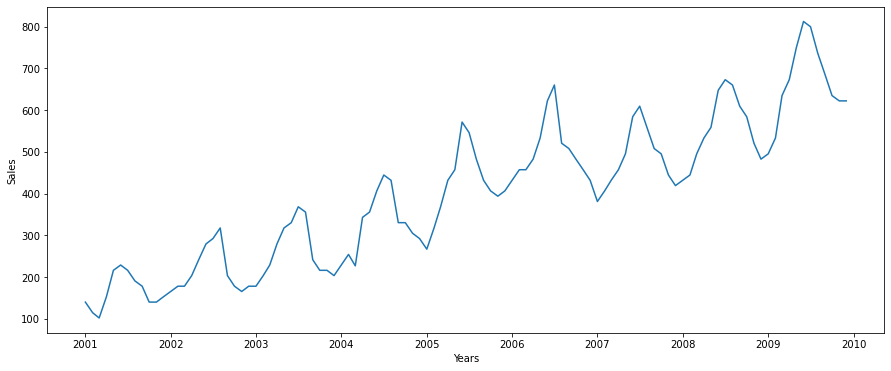

In [5]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'Years', y='Sales', data=df)
plt.show()

In [6]:
df1 = df.set_index('Years')
df1.head()

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9


<AxesSubplot:xlabel='Years'>

<Figure size 1080x432 with 0 Axes>

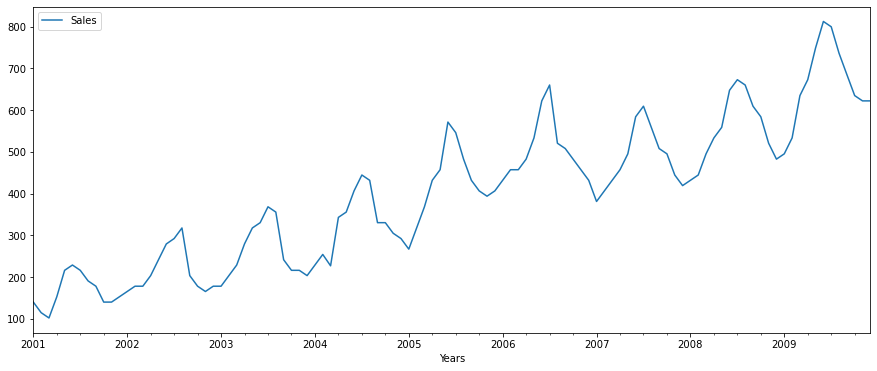

In [7]:
df1.plot(kind='line')

#### Heat Maps

In [8]:
df['year']=df['Years'].dt.year
df['quarter']=df['Years'].dt.quarter

In [9]:
df.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


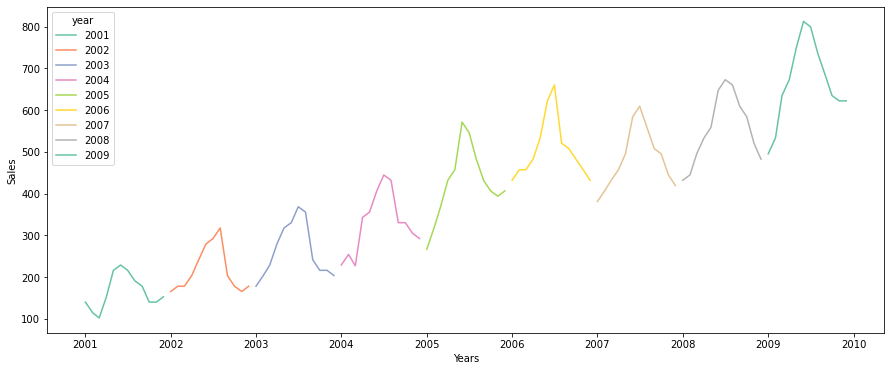

In [14]:
sns.lineplot(x='Years', y='Sales', data=df, hue='year', palette='Set2')
plt.show()

#### Area Chart

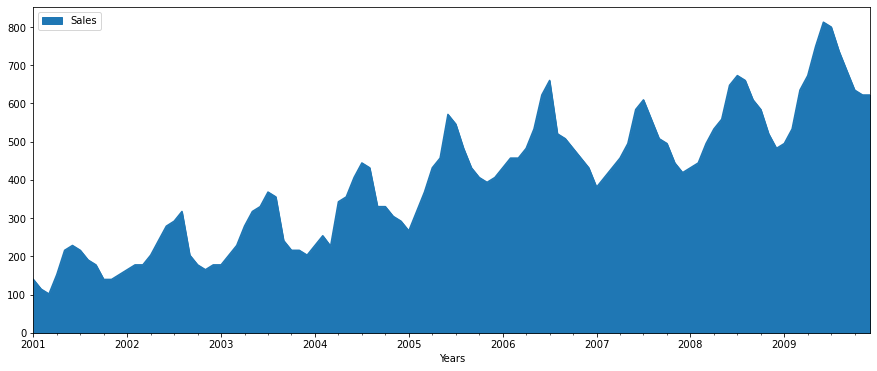

In [15]:
df1.plot(kind='area')
plt.show()

#### Bar Chart

In [16]:
df.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


In [20]:
df_year = df[['Sales','year']].groupby(by='year').sum().reset_index()

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0
5,2006,6045.2
6,2007,5791.2
7,2008,6642.1
8,2009,8000.7


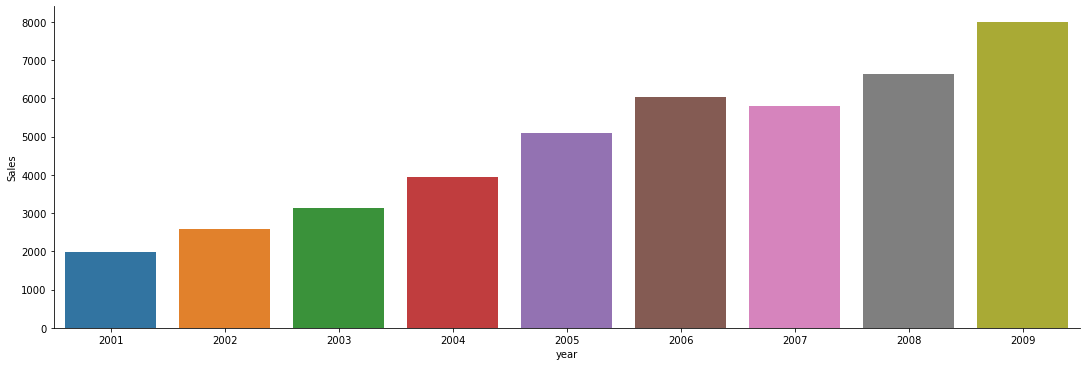

In [22]:
sns.catplot(x='year', y='Sales', data=df_year, kind='bar', aspect=3)

#### Stacked Bar Plot

In [25]:
sales = df[['Sales', 'year', 'quarter']].groupby(by=['year','quarter']).sum().values
sales

array([[ 355.6],
       [ 596.9],
       [ 584.2],
       [ 431.8],
       [ 520.7],
       [ 723.6],
       [ 812.8],
       [ 520.7],
       [ 609.6],
       [ 927.1],
       [ 965.2],
       [ 635. ],
       [ 709.3],
       [1104.9],
       [1206.5],
       [ 927.1],
       [ 952.5],
       [1460.5],
       [1460.5],
       [1206.5],
       [1346.2],
       [1638.3],
       [1689.1],
       [1371.6],
       [1219.2],
       [1536.7],
       [1676.4],
       [1358.9],
       [1371.6],
       [1739.9],
       [1943.1],
       [1587.5],
       [1663.7],
       [2235.2],
       [2222.2],
       [1879.6]])

In [26]:
sales.shape

(36, 1)

In [27]:
sales.reshape(9,4)

array([[ 355.6,  596.9,  584.2,  431.8],
       [ 520.7,  723.6,  812.8,  520.7],
       [ 609.6,  927.1,  965.2,  635. ],
       [ 709.3, 1104.9, 1206.5,  927.1],
       [ 952.5, 1460.5, 1460.5, 1206.5],
       [1346.2, 1638.3, 1689.1, 1371.6],
       [1219.2, 1536.7, 1676.4, 1358.9],
       [1371.6, 1739.9, 1943.1, 1587.5],
       [1663.7, 2235.2, 2222.2, 1879.6]])

In [29]:
df_sales = pd.DataFrame(sales.reshape(9,4), index=list(range(2001,2010)), columns=['Q1', 'Q2', 'Q3', 'Q4'])

In [30]:
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


<AxesSubplot:>

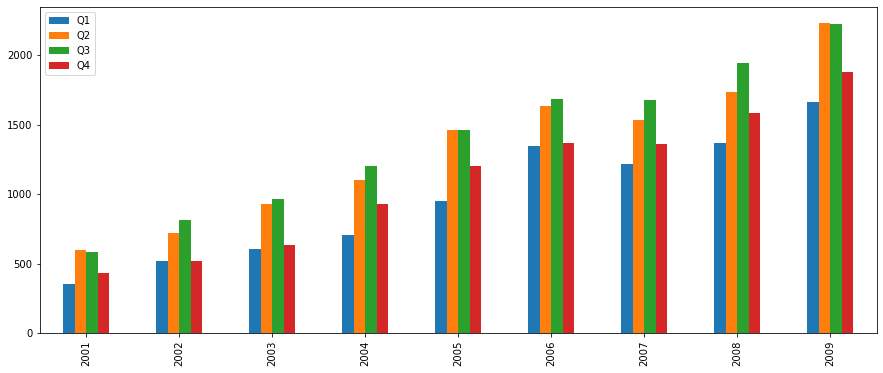

In [31]:
df_sales.plot(kind='bar')

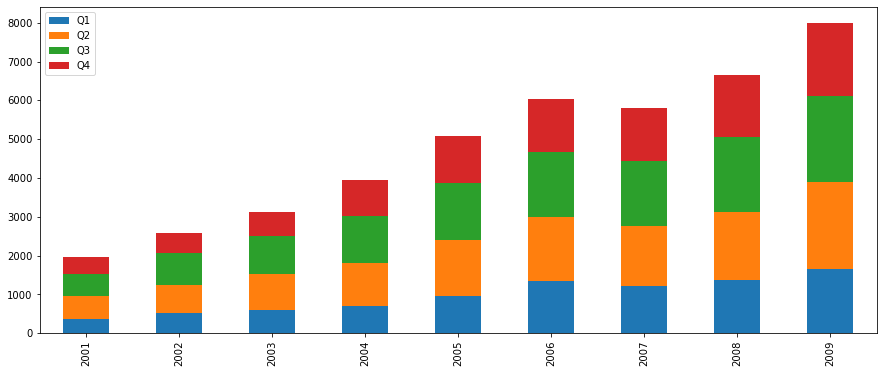

In [32]:
df_sales.plot(kind='bar', stacked=True)
plt.show()

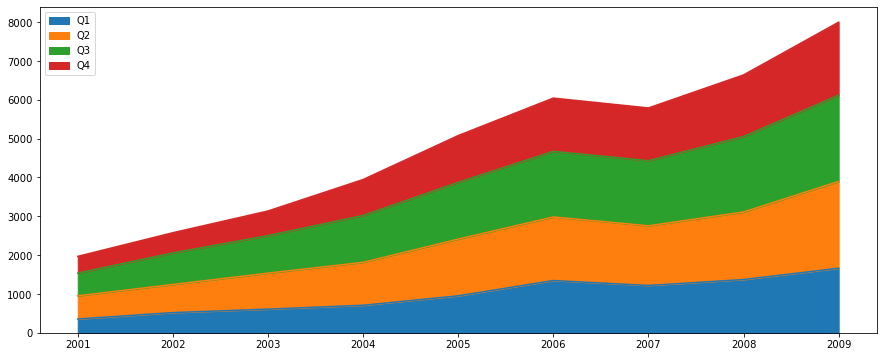

In [33]:
df_sales.plot(kind='area', stacked=True)
plt.show()

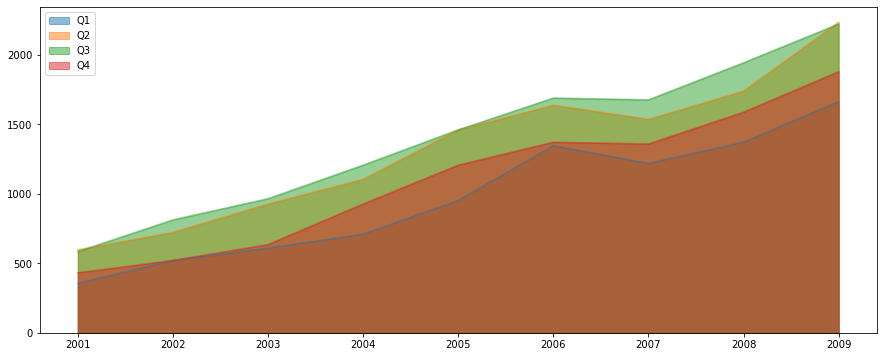

In [34]:
df_sales.plot(kind='area', stacked=False)
plt.show()

#### Heatmaps

In [35]:
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


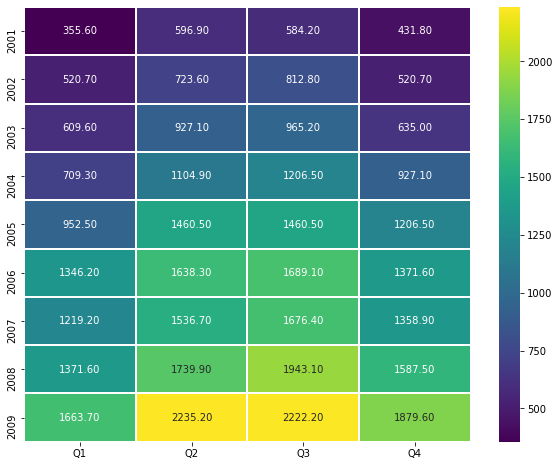

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df_sales, annot=True, fmt='.2f', cmap='viridis', linewidths=1)
plt.show()